In [3]:
import pandas as pd
# DATA MANIPULATION
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import datetime

# STATS
from statsmodels.graphics.gofplots import qqplot

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# ML
## PREPROC
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
## METRICS
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
## SUPERVISED MODEL
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
## UNSUPERVISED
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
## TUNING
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

df = pd.read_csv("../raw_data/games_infos.csv")


In [2]:
df

,App_ID,Name,Release_Date,Estimated_Owners,Peak_CCU,Required_Age,Price,DLC_Count,About_The_Game,Supported_Languages,Full_Audio_Languages,Reviews,Header_Image,Website,Support_URL,Support_Email,Windows,Mac,Linux,Metacritic_Score,Metacritic_URL,User_Score,Positive,Negative,Score_Rank,Achievements,Recommendations,Notes,Average_Playtime_Forever,Average_Playtime_2Weeks,Median_Playtime_Forever,Median_Playtime_2Weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,32400,"STAR WARS™ Dark Forces (Classic, 1995)","16 Sep, 2009",500000 - 1000000,6,0,5.89,None,Purchase STAR WARS ™ Dark Forces Remaster Bund...,"['English', 'French', 'German', 'Italian', 'Sp...","['English', 'French', 'German', 'Italian', 'Sp...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.lucasarts.com,http://help.starwars.com/,NaN,True,True,False,None,NaN,0,2510,293,NaN,None,2202,NaN,288,0,52,0,LucasArts,"LucasArts,Lucasfilm,Disney","Single-player,Steam Cloud,Family Sharing",Action,"FPS,Action,Classic,Sci-fi,Shooter,Retro,First-...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,2060170,Solas City Heroes,"25 Apr, 2023",0 - 20000,16,0,16.79,1,A Superhero Beat em’ up with a kinky twist! So...,['English'],['English'],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://skyflarestudios.com/,https://discord.com/invite/hjxwd2k,NaN,True,False,False,None,NaN,0,0,0,NaN,25,116,Solas City Heroes contains 3D animations of ex...,0,0,0,0,"Skyflare Studios,MrZGames",Skyflare Studios,"Single-player,Steam Achievements,Partial Contr...",Action,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1947530,Fidget Spinner RPG,"26 Sep, 2023",20000 - 50000,2,0,3.99,None,"Spin, craft, upgrade, and violate the laws of ...",['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,brycesummer@gmail.com,True,False,False,None,NaN,0,174,28,NaN,98,185,NaN,0,0,0,0,Bryce Summer,Bryce Summer,"Single-player,Steam Cloud,Family Sharing","Casual,Indie,RPG,Simulation","Casual,RPG,Clicker,Family Friendly,Crafting,Id...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,2020480,魔導聖戰:風色幻想,"8 Aug, 2022",50000 - 100000,2,0,1.59,None,游戏玩法 全新的『徽章转职系统』搭载，近百种职业任君挑选 可自由组合角色特技的『徽章特技系统...,['Traditional Chinese'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,https://www.fhyx.hk/server/,NaN,True,False,False,None,NaN,0,86,12,NaN,None,None,NaN,0,0,0,0,弘煜科技事業股份有限公司,Phoenix Games,"Single-player,Family Sharing","Adventure,RPG,Strategy","Adventure,Strategy,RPG,Turn-Based Strategy,Boa...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1771430,Maid for Pleasure,"10 Dec, 2021",0 - 20000,1,0,5.99,None,Your family fortune is kaput and all you're le...,"['English', 'Spanish - Spain', 'Spanish - Lati...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,support@cherrykissgames.com,True,True,True,None,NaN,0,0,0,NaN,14,None,- Large portions of the game include nudity an...,0,0,0,0,Miel,Cherry Kiss Games,"Single-player,Steam Achievements,Full controll...",Casual,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22353,1204550,Kamtris,"12 May, 2020",0 - 20000,0,0,2.39,None,In the game you need to make love pairs by rot...,"['English', 'Russian', 'German', 'Spanish - Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,http://horovo-games.site,oasandios@gmail.com,True,False,True,None,NaN,0,0,0,NaN,8,None,Kamtris is a small game combining Kamasutra an...,0,0,0,0,Horovo Games,Horovo Games,"Single-player,Steam Achievements,Steam Cloud,F...","Casual,Indie",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
223

In [3]:
(df['Required_Age'].value_counts()) / len(df['Required_Age'])

0     0.971688
18    0.014939
16    0.008140
12    0.002326
17    0.001297
15    0.000537
13    0.000447
7     0.000313
3     0.000134
20    0.000045
11    0.000045
1     0.000045
14    0.000045
Name: Required_Age, dtype: float64

In [4]:
y = pd.read_csv("../raw_data/player_history.csv")
y

,App_ID,Month,Avg. Players,Peak Players
0,32400,Last 30 Days,7.92,27.0
1,32400,February 2024,6.67,19.0
2,32400,January 2024,7.33,23.0
3,32400,December 2023,6.85,24.0
4,32400,November 2023,5.17,18.0
...,...,...,...,...
801266,278970,October 2015,29.24,125.0
801267,278970,September 2015,57.97,169.0
801268,278970,August 2015,106.67,230.0
801269,278970,July 2015,174.36,418.0


In [5]:
UNIQUE_LANGUAGES = ["english",'French', 'german', 'italian', 'spanish - spain',
       'spanish - latin america', 'simplified chinese',
       'traditional chinese', 'russian', 'japanese', 'korean',
       'portuguese - brazil', 'turkish', 'welsh', 'vietnamese', 'danish',
       'portuguese - portugal', 'dutch', 'polish', 'czech', 'ukrainian',
       'arabic', 'bulgarian', 'hungarian', 'greek', 'norwegian',
       'romanian', 'thai', 'finnish', 'swedish', 'croatian', 'estonian',
       'hebrew', 'icelandic', 'latvian', 'lithuanian', 'maori', 'slovak',
       'slovenian', 'indonesian', 'serbian', 'uzbek', 'urdu', 'armenian',
       'igbo', 'sindhi', 'sinhala', 'cherokee', 'galician', 'catalan',
       'afrikaans', 'kannada', 'luxembourgish', 'hindi', 'gujarati',
       'kyrgyz', 'kazakh', 'turkmen', 'kinyarwanda',
       'tajik', 'odia', 'konkani', 'bangla', 'nepali', 'basque',
       'tigrinya', 'swahili', 'punjabi (gurmukhi)', 'punjabi (shahmukhi)',
       'georgian', 'wolof', 'bosnian', 'persian', 'telugu', 'tamil',
       'irish', 'valencian', 'belarusian', 'quechua', 'zulu', 'xhosa',
       'sotho', 'sorani', 'yoruba', 'uyghur', 'scots', 'tswana',
       'filipino', 'mongolian', 'hausa', 'dari', 'azerbaijani', 'amharic',
       'albanian', 'assamese', 'tatar', 'macedonian', 'marathi',
       'malayalam', 'malay', 'maltese', 'khmer', 'german;',
       'hungarian,polish', 'english dutch',
       'traditional chinese (text only)', 'lang_slovakian']
EUROPEAN_LANGUAGES = ["German", "French", "Italian", 'Spanish - Spain', "Portuguese - Portugal"]


In [6]:
language_proportions = {}
UNIQUE_LANGUAGES.
    # calculate proportion for each language
for lang in UNIQUE_LANGUAGES:
    lang_count = (df['Supported_Languages'].str.contains(lang).sum()) / len(df)
    language_proportions[lang] = lang_count
language_proportions

SyntaxError: invalid syntax (1554870641.py, line 2)

In [ ]:
def transform_language_features(data_X: pd.DataFrame) -> pd.DataFrame:
    assert isinstance(data_X, pd.DataFrame)

    # initialize lists to store languages and their proportions
    language_proportions = {}

    # calculate proportion for each language
    for lang in UNIQUE_LANGUAGES:
        lang_count = (data_X['Supported_Languages'].str.contains(lang).sum()) / len(data_X)
        language_proportions[lang] = lang_count

    # order depending on language proportions
    sorted_languages = sorted(language_proportions.items(), key=lambda x: x[1], reverse=True)

    # define european language
    language_proportions['European'] = language_proportions['German'] + language_proportions['French'] + language_proportions['Italian'] + language_proportions['Spanish - Spain'] + language_proportions['Portuguese - Portugal']

    # Initialize top languages
    top_languages = []

    # iterate over the languages to add them to the list
    for lang, proportion in sorted_languages:
        if lang not in EUROPEAN_LANGUAGES:
            top_languages.append(lang)
        if len(top_languages) == 10:
            break

    # make every language a colomn
    for lang in top_languages:
        if lang == 'European':  # Utilisez '==' pour la comparaison d'égalité, pas '='
            data_X[lang] = data_X['Supported_Languages'].str.contains("German|French|Italian|Spanish - Spain|Portuguese - Portugal", case=False, regex=True)
        else:
            data_X[lang] = data_X['Supported_Languages'].str.contains(lang, case=False, regex=True)

        data_X[lang] = data_X[lang].astype(int)

    return data_X

In [ ]:
X = transform_language_features(df)

In [ ]:
filtered_y = y[y['App_ID'] == 1597580]
filtered_y

In [ ]:
df = df[["App_ID","Release_Date","Price","Supported_Languages","Support_URL","Windows","Mac","Linux","Achievements","Developers","Publishers","Categories","Genres"]]

In [ ]:
chinese_count = (df['Supported_Languages'].str.contains('Italian').sum())/len(df)
chinese_count

In [ ]:
import ast

languages_str = "['English', 'Russian']"
languages_list = ast.literal_eval(languages_str)
languages_list

In [ ]:
unique_languages = df['Supported_Languages'].str.split(', ').explode().unique()
unique_languages

In [ ]:
unique_languages = ["French", "Chinese", "Italian", "Russian", "German", "English", "Japanese", "Korean", "Arabic", "Indonesian", "Dutch", "Spanish", "Portuguese", "Filipino",
                   "Thai", "Afrikaans", "Hindi", "Turkish", "Wolof", "Slovak", 'Spanish - latin america']

# Initialize lists to store languages and their proportions
languages = []
proportions = []

# Calculate proportion for each language
for lang in unique_languages:
    lang_count = (df['Supported_Languages'].str.contains(lang).sum()) / len(df)
    languages.append(lang)
    proportions.append(lang_count)

# Plot the proportions
plt.figure(figsize=(10, 6))
plt.bar(languages, proportions, color='skyblue')
plt.xlabel('Language')
plt.ylabel('Proportion')
plt.title('Proportion of Entries Supporting Different Languages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
unique_languages = ["english",'French', 'german', 'italian', 'spanish - spain',
       'spanish - latin america', 'simplified chinese',
       'traditional chinese', 'russian', 'japanese', 'korean',
       'portuguese - brazil', 'turkish', 'welsh', 'vietnamese', 'danish',
       'portuguese - portugal', 'dutch', 'polish', 'czech', 'ukrainian',
       'arabic', 'bulgarian', 'hungarian', 'greek', 'norwegian',
       'romanian', 'thai', 'finnish', 'swedish', 'croatian', 'estonian',
       'hebrew', 'icelandic', 'latvian', 'lithuanian', 'maori', 'slovak',
       'slovenian', 'indonesian', 'serbian', 'uzbek', 'urdu', 'armenian',
       'igbo', 'sindhi', 'sinhala', 'cherokee', 'galician', 'catalan',
       'afrikaans', 'kannada', 'luxembourgish', 'hindi', 'gujarati',
       'kyrgyz', 'kazakh', 'turkmen', 'kinyarwanda',
       'tajik', 'odia', 'konkani', 'bangla', 'nepali', 'basque',
       'tigrinya', 'swahili', 'punjabi (gurmukhi)', 'punjabi (shahmukhi)',
       'georgian', 'wolof', 'bosnian', 'persian', 'telugu', 'tamil',
       'irish', 'valencian', 'belarusian', 'quechua', 'zulu', 'xhosa',
       'sotho', 'sorani', 'yoruba', 'uyghur', 'scots', 'tswana',
       'filipino', 'mongolian', 'hausa', 'dari', 'azerbaijani', 'amharic',
       'albanian', 'assamese', 'tatar', 'macedonian', 'marathi',
       'malayalam', 'malay', 'maltese', 'khmer', 'german;',
       'hungarian,polish', 'english dutch',
       'traditional chinese (text only)', 'lang_slovakian']

unique_languages = [lang.title() for lang in unique_languages]
# Initialize lists to store languages and their proportions
language_proportions = {}

# Calculate proportion for each language
for lang in unique_languages:
    lang_count = (df['Supported_Languages'].str.contains(lang).sum()) / len(df)
    language_proportions[lang] = lang_count

language_proportions

sorted_language_proportions = sorted(language_proportions.items(), key=lambda item: item[1], reverse=True)

# Créer un nouveau dictionnaire à partir des éléments triés
sorted_language_proportions_dict = {lang: proportion for lang, proportion in sorted_language_proportions}

# Extraire les langues triées et les proportions triées
sorted_languages = [lang for lang, proportion in sorted_language_proportions]
sorted_proportions = [proportion for lang, proportion in sorted_language_proportions]

# Tracer les proportions
plt.figure(figsize=(10, 6))
plt.bar(sorted_languages, sorted_proportions, color='skyblue')
plt.xlabel('Language')
plt.ylabel('Proportion')
plt.title('Proportion of Entries Supporting Different Languages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.xlim(-0.5, 19.5)
plt.show()

In [ ]:
language_proportions

In [ ]:
language_proportions['European'] = language_proportions['German'] + language_proportions['French'] + language_proportions['Italian'] + language_proportions['Spanish - Spain'] + language_proportions['Portuguese - Portugal']

# Trier le dictionnaire selon les proportions décroissantes
sorted_languages = sorted(language_proportions.items(), key=lambda x: x[1], reverse=True)

exclude_languages = ["German", "French", "Italian", 'Spanish - Spain', "Portuguese - Portugal"]

# Initialiser la liste des 10 premières langues
top_languages = []

# Parcourir les langues triées et ajouter à la liste si elles ne sont pas exclues
for lang, proportion in sorted_languages:
    if lang not in exclude_languages:
        top_languages.append(lang)
    if len(top_languages) == 10:  # Sortir de la boucle une fois que les 10 langues sont ajoutées
        break

# Afficher la liste des 10 langues avec les proportions les plus élevées
print(top_languages)

In [ ]:
# languages = [
#     'English', 'German', 'French', 'Simplified Chinese', 'Spanish - Spain',
#     'Russian', 'Japanese', 'Italian', 'Korean', 'Traditional Chinese',
#     'Portuguese - Brazil', 'Polish', 'Turkish', 'Portuguese - Portugal',
#     'Spanish - Latin America', 'Dutch', 'Czech', 'Ukrainian', 'Swedish', 'Hungarian'
# ]

# Appliquer les étapes à chaque langue
for lang in top_languages:
    if lang == 'European':  # Utilisez '==' pour la comparaison d'égalité, pas '='
        df[lang] = df['Supported_Languages'].str.contains("German|French|Italian|Spanish - Spain|Portuguese - Portugal", case=False, regex=True)
    else:
        df[lang] = df['Supported_Languages'].str.contains(lang, case=False, regex=True)
    
    df[lang] = df[lang].astype(int)


In [ ]:
df['other'] = ~df['Supported_Languages'].str.contains('|'.join(top_languages), case=False, regex=True)
df['other'] = df['other'].astype(int)

df

In [ ]:
df

In [ ]:
# Créer une sous-dataframe avec les colonnes sélectionnées
selected_df = df[languages]

# Calculer la matrice de corrélation
correlation_matrix = selected_df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
correlation_matrix = selected_df.corr()

# Créer un heatmap avec Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

In [ ]:
# df_test.loc[:, 'Italian'] = df_test['Supported_Languages'].str.contains('Italian')
# df_test['Italian'] = df_test['Italian'].astype(int)

In [ ]:
proportions_df['Language'][:20]

In [ ]:
import pandas as pd

# Créer un DataFrame à partir des résultats de proportions
one_hot_languages = pd.get_dummies(proportions_df['Language'][:20])

# Concaténer les proportions et les variables one-hot
proportions_with_one_hot = pd.concat([proportions_df['Proportion'], one_hot_languages], axis=1)

# Calculer la matrice de corrélation
correlation_matrix = proportions_with_one_hot.corr()

# Afficher la matrice de corrélation
print(correlation_matrix)

In [ ]:
import seaborn as sns

# Créer la matrice de corrélation
correlation_matrix = df.corr()

# Tracer la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='mixed', dayfirst=True)
df['Release_Date']

In [ ]:
df['Release_Date'].isna().sum()
df['Price'].isna().sum() #moyenne
# df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].median())

df['Achievements'].isna().sum() #to 0
df['Developers'].isna().sum() #on enleve
df['Publishers'].isna().sum() #on met le developper sinon on enleve
df['Categories'].isna().sum() # on eneleve
df['Genres'].isna().sum() # on rempli a la main ou on enleve

In [ ]:
df.loc[:, 'Achievements'] = df['Achievements'].fillna(0)

In [ ]:
df['Achievements'].isna().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.dtypes.value_counts()

In [ ]:
X_num = df.select_dtypes(include="number").drop(columns=["App_ID"])
X_num.dtypes

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

for variable in list(X_num.columns):
    print("-"*50)

    fig, ax = plt.subplots(1,3,figsize=(15,5))

    ax[0].set_title(f"Distribution of the {variable}")
    sns.histplot(data = X_num, x = f"{variable}", kde=True, ax = ax[0])

    ax[1].set_title(f"Boxplot of the {variable}")
    sns.boxplot(data = X_num, x = f"{variable}", ax=ax[1])

    ax[2].set_title(f"Gaussianity of:the {variable}")
    qqplot(X_num[f"{variable}"],line='s',ax=ax[2]);
    
    plt.show();

In [ ]:
robust_features = ["Price", "Achievements"]
standard_features = []
minmax_features = []

In [7]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

scalers = ColumnTransformer([
    ("rob", RobustScaler(), robust_features), # Robust
    ("std", StandardScaler(), standard_features), # Std
    ("mm", MinMaxScaler(), minmax_features), # MinMax
])

numerical_pipeline = Pipeline([
    ("imputer", KNNImputer()),
    ("scalers", scalers)
])

numerical_pipeline

NameError: name 'robust_features' is not defined

In [ ]:
X_cat

In [ ]:
dev_count = df["Developers"].value_counts()
dev_count[dev_count != 1]

In [ ]:
X_cat = df.select_dtypes(exclude="number")
X_cat.dtypes

In [ ]:
ordinal_features = []
onehot_features = [ "Supported_Languages", "Genres", "categories"]

In [ ]:
ordinal_features_dict = {}

ordinal_values = [ordinal_features_dict[key] for key in ordinal_features_dict.keys()]
ordinal_values

In [8]:
import numpy as np

encoders = ColumnTransformer([
    ("ord", OrdinalEncoder(categories = ordinal_values, 
                           dtype = np.int64,
                           handle_unknown = "use_encoded_value",
                           unknown_value = -1),
     ordinal_features), # Ordinal
    ("one_hot", OneHotEncoder(sparse_output=False,
                              drop="if_binary",
                              handle_unknown="ignore"),
     onehot_features) # OHE
], remainder="passthrough")

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoders", encoders)
])

categorical_pipeline

NameError: name 'ordinal_values' is not defined

In [9]:
preprocessor = ColumnTransformer([
    ("num_pipeline", numerical_pipeline, make_column_selector(dtype_include="number")), # num_features
    ("cat_pipeline", categorical_pipeline, make_column_selector(dtype_exclude="number")) # cat_features
], remainder="passthrough").set_output(transform="pandas")

preprocessor

NameError: name 'numerical_pipeline' is not defined

In [10]:
developers_count = df['Publishers'].value_counts()
count_of_ones = (developers_counts == 5).sum()
count_of_ones

NameError: name 'developers_counts' is not defined

In [11]:
developers_count = df['Publishers'].value_counts()
count_of_ones = ((developers_counts > 10) & (developers_counts < 250)).sum()
count_of_ones

NameError: name 'developers_counts' is not defined

In [12]:
def assign_category_publisher(count:int)-> int:
    if count == 0:
        return 0
    elif count == 1:
        return 1
    elif count == 2:
        return 2
    elif count == 3:
        return 3
    elif count == 4:
        return 4
    elif count == 5:
        return 5
    elif 6 <= count <= 10:
        return 6
    else:  # Plus de 10
        return 7

In [13]:
publishers_counts = df['Publishers'].groupby(df['Publishers']).transform('count')

# Appliquer la fonction assign_category_developer
df["pub_category"] = publishers_counts.apply(assign_category_publisher)

In [14]:
df["pub_category"]

0        7
1        1
2        1
3        6
4        7
        ..
22353    2
22354    7
22355    2
22356    1
22357    1
Name: pub_category, Length: 22358, dtype: int64

In [15]:
df

,App_ID,Name,Release_Date,Estimated_Owners,Peak_CCU,Required_Age,Price,DLC_Count,About_The_Game,Supported_Languages,Full_Audio_Languages,Reviews,Header_Image,Website,Support_URL,Support_Email,Windows,Mac,Linux,Metacritic_Score,Metacritic_URL,User_Score,Positive,Negative,Score_Rank,Achievements,Recommendations,Notes,Average_Playtime_Forever,Average_Playtime_2Weeks,Median_Playtime_Forever,Median_Playtime_2Weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,pub_category
0,32400,"STAR WARS™ Dark Forces (Classic, 1995)","16 Sep, 2009",500000 - 1000000,6,0,5.89,None,Purchase STAR WARS ™ Dark Forces Remaster Bund...,"['English', 'French', 'German', 'Italian', 'Sp...","['English', 'French', 'German', 'Italian', 'Sp...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.lucasarts.com,http://help.starwars.com/,NaN,True,True,False,None,NaN,0,2510,293,NaN,None,2202,NaN,288,0,52,0,LucasArts,"LucasArts,Lucasfilm,Disney","Single-player,Steam Cloud,Family Sharing",Action,"FPS,Action,Classic,Sci-fi,Shooter,Retro,First-...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,7
1,2060170,Solas City Heroes,"25 Apr, 2023",0 - 20000,16,0,16.79,1,A Superhero Beat em’ up with a kinky twist! So...,['English'],['English'],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://skyflarestudios.com/,https://discord.com/invite/hjxwd2k,NaN,True,False,False,None,NaN,0,0,0,NaN,25,116,Solas City Heroes contains 3D animations of ex...,0,0,0,0,"Skyflare Studios,MrZGames",Skyflare Studios,"Single-player,Steam Achievements,Partial Contr...",Action,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1
2,1947530,Fidget Spinner RPG,"26 Sep, 2023",20000 - 50000,2,0,3.99,None,"Spin, craft, upgrade, and violate the laws of ...",['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,brycesummer@gmail.com,True,False,False,None,NaN,0,174,28,NaN,98,185,NaN,0,0,0,0,Bryce Summer,Bryce Summer,"Single-player,Steam Cloud,Family Sharing","Casual,Indie,RPG,Simulation","Casual,RPG,Clicker,Family Friendly,Crafting,Id...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1
3,2020480,魔導聖戰:風色幻想,"8 Aug, 2022",50000 - 100000,2,0,1.59,None,游戏玩法 全新的『徽章转职系统』搭载，近百种职业任君挑选 可自由组合角色特技的『徽章特技系统...,['Traditional Chinese'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,https://www.fhyx.hk/server/,NaN,True,False,False,None,NaN,0,86,12,NaN,None,None,NaN,0,0,0,0,弘煜科技事業股份有限公司,Phoenix Games,"Single-player,Family Sharing","Adventure,RPG,Strategy","Adventure,Strategy,RPG,Turn-Based Strategy,Boa...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,6
4,1771430,Maid for Pleasure,"10 Dec, 2021",0 - 20000,1,0,5.99,None,Your family fortune is kaput and all you're le...,"['English', 'Spanish - Spain', 'Spanish - Lati...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,support@cherrykissgames.com,True,True,True,None,NaN,0,0,0,NaN,14,None,- Large portions of the game include nudity an...,0,0,0,0,Miel,Cherry Kiss Games,"Single-player,Steam Achievements,Full controll...",Casual,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22353,1204550,Kamtris,"12 May, 2020",0 - 20000,0,0,2.39,None,In the game you need to make love pairs by rot...,"['English', 'Russian', 'German', 'Spanish - Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,http://horovo-games.site,oasandios@gmail.com,True,False,True,None,NaN,0,0,0,NaN,8,None,Kamtris is a small game combining Kamasutra an...,0,0,0,0,Horovo Games,Horovo Games,"Single-player,Steam Achievements,Steam Cloud,F...","Casual,Indie",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamsta

In [258]:
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import os
from PIL import Image

def load_flowers_data(loading_method):
    if loading_method == 'colab':
        data_path = '/content/drive/My Drive/Deep_learning_data/flowers'
    elif loading_method == 'direct':
        data_path = 'flowers/'
    classes = {'daisy':0, 'dandelion':1, 'rose':2}
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:300]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                image = image.resize((256, 256))
                imgs.append(np.array(image))
                labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    first_split = int(len(imgs) /6.)
    second_split = first_split + int(len(imgs) * 0.2)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes

In [163]:
!pip install tqdm

In [167]:
!wget https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip
!unzip flowers-dataset.zip

--2024-03-21 14:42:48--  https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip
Resolving wagon-public-datasets.s3.amazonaws.com (wagon-public-datasets.s3.amazonaws.com)... 52.92.35.201, 52.92.36.17, 52.92.19.81, ...
Connecting to wagon-public-datasets.s3.amazonaws.com (wagon-public-datasets.s3.amazonaws.com)|52.92.35.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104983809 (100M) [application/zip]
Saving to: ‘flowers-dataset.zip.2’

flowers-dataset.zip 100%[===================>] 100.12M  36.7MB/s    in 2.7s    

2024-03-21 14:42:51 (36.7 MB/s) - ‘flowers-dataset.zip.2’ saved [104983809/104983809]

Archive:  flowers-dataset.zip
replace flowers/daisy/2607132536_d95198e619_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [260]:
X_train, y_train, X_val, y_val, X_test, y_test, num_classes = load_flowers_data('direct')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 299/299 [00:02<00:00, 108.22it/s]


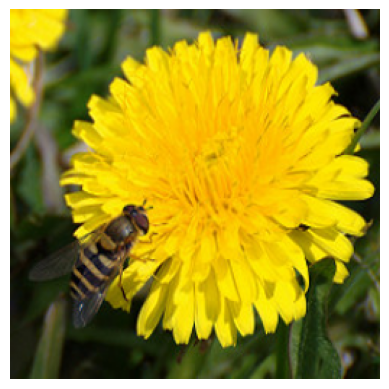

In [261]:
X_train[0].shape
plt.imshow(X_train[5])
plt.axis('off')  # Turn off axis labels
plt.show()

In [192]:
X_train.shape

(571, 256, 256, 3)

# Load Image

In [22]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image as keras_image
# import numpy as np

# chemin_image = "../raw_data/maxresdefault.jpg"

# image = Image.open(chemin_image)

# target_size = (256, 256)
# image_resized = image.resize(target_size)

# image_array1 = keras_image.img_to_array(image_resized)

# image_array = image_array1.reshape((1, *image_array1.shape))

# # Prétraiter l'image pour l'utiliser avec le modèle VGG
# image_preprocessed = preprocess_input(image_array)


In [23]:
import os

def list_image_files(directory):
    # Liste pour stocker les chemins des fichiers image
    image_files = []
    # Parcourir tous les fichiers et sous-répertoires dans le dossier spécifié
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Vérifier si le fichier a une extension d'image valide
            if file.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                # Construire le chemin complet du fichier
                file_path = os.path.join(root, file)
                # Ajouter le chemin du fichier à la liste
                image_files.append(file_path)
    return image_files

# Spécifier le chemin du dossier contenant les images
directory_path = "/chemin/vers/votre/dossier"

# Obtenir les chemins des fichiers image dans le dossier spécifié
image_paths = list_image_files(directory_path)

# Afficher les chemins des fichiers image
for path in image_paths:
    print(path)

In [24]:
target_size = (256, 256)

# Liste pour stocker les images prétraitées sous forme de tableaux numpy
images_preprocessed = []

# Parcourir chaque chemin d'image dans la liste image_paths
for image_path in image_paths:
    # Charger l'image depuis le chemin du fichier et redimensionner à la taille souhaitée
    image = load_img(image_path, target_size=target_size)
    # Convertir l'image en tableau numpy
    image_array = img_to_array(image)
    # Ajouter l'image prétraitée à la liste
    images_preprocessed.append(image_array)

# Convertir la liste d'images prétraitées en un tableau numpy
images_array = np.array(images_preprocessed)


In [25]:
image_paths

[]

In [26]:
from PIL import Image
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def list_image_files(directory):
    image_files = []
    for file in os.listdir(directory):
        if file.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            file_path = os.path.join(directory, file)
            image_files.append(file_path)
    return image_files

directory_path = "../raw_data/downloaded_images"
chemins_images = list_image_files(directory_path)

images_preprocessed = []
target_size = (256, 256)

for chemin_image in chemins_images:
    image = load_img(chemin_image, target_size=target_size)
    image_array = img_to_array(image)
    images_preprocessed.append(image_array)

images_array = np.array(images_preprocessed)
images_array = images_array/255

print("tableau numpy :", images_array.shape)

tableau numpy : (48, 256, 256, 3)


In [27]:
images_array[-5].shape

(256, 256, 3)

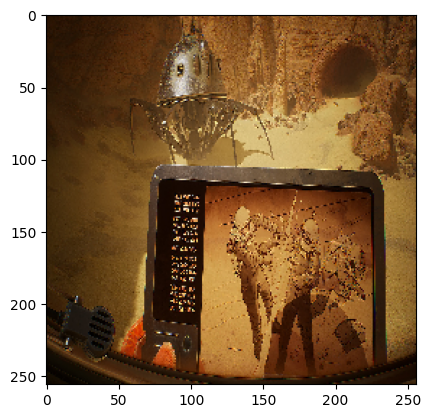

In [28]:
plt.imshow(images_array[1])
plt.show()

In [29]:
import os
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

dossier_images = "../raw_data/downloaded_images"

chemins_images = []

for fichier in os.listdir(dossier_images):
    # Vérifier si le fichier est une image
    if fichier.endswith(".jpg") or fichier.endswith(".jpeg") or fichier.endswith(".png"):
        # Construire le chemin complet de l'image
        chemin_image = os.path.join(dossier_images, fichier)
        # Ajouter le chemin de l'image à la liste
        chemins_images.append(chemin_image)

images = []
for chemin_image in chemins_images:
    # Charger l'image avec PIL
    image = load_img(chemin_image)
    # Ajouter l'image à la liste
    images.append(image)

In [30]:
input_shape = (256, 256)

images_preprocessed = []

# Parcourir chaque image dans la liste d'images
for image in images:
    # Redimensionner l'image à la taille souhaitée
    image_resized = image.resize(input_shape)
    # Convertir l'image en tableau numpy
    image_array2 = img_to_array(image_resized)
    # if image_array2.shape == (256,256,1):
    #     image_vide = np.zeros((256,256,1))
    #     image_array2 = np.concatenate([image_array2, image_vide, image_vide], axis=2)
    # Ajouter l'image prétraitée à la liste
    images_preprocessed.append(image_array2/255)

In [31]:
image_array = np.asarray(images_preprocessed)
image_array.shape

(48, 256, 256, 3)

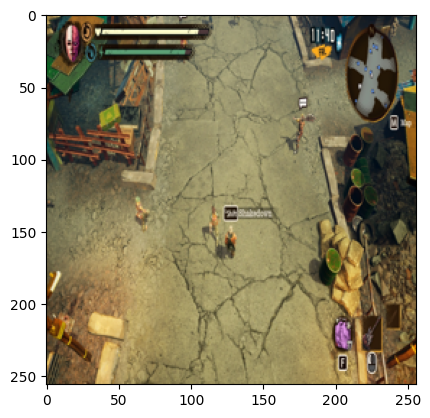

In [32]:
plt.imshow(image_array[0])

In [33]:
for taille in images_preprocessed:
    print(taille.shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


# Y_player

In [55]:
Y_player = pd.read_csv("../raw_data/player_one_month_peak_P.csv")
Y_rating = pd.read_csv("../raw_data/y_rating.csv")

In [35]:
Y_player

,App_ID,Peak Players
0,32400,38.0
1,2060170,58.0
2,1947530,67.0
3,1771430,8.0
4,413710,482.0
...,...,...
15851,1607130,755.0
15852,757380,7.0
15853,1831320,23.0
15854,1597580,15.0


In [36]:
chemins_images

['../raw_data/downloaded_images/1702260_0.jpg',
 '../raw_data/downloaded_images/731040_0.jpg',
 '../raw_data/downloaded_images/842120_0.jpg',
 '../raw_data/downloaded_images/523150_0.jpg',
 '../raw_data/downloaded_images/2060170_0.jpg',
 '../raw_data/downloaded_images/1710100_0.jpg',
 '../raw_data/downloaded_images/32400_0.jpg',
 '../raw_data/downloaded_images/1231580_0.jpg',
 '../raw_data/downloaded_images/413710_0.jpg',
 '../raw_data/downloaded_images/57620_0.jpg',
 '../raw_data/downloaded_images/789900_0.jpg',
 '../raw_data/downloaded_images/1325730_0.jpg',
 '../raw_data/downloaded_images/657010_0.jpg',
 '../raw_data/downloaded_images/1303670_0.jpg',
 '../raw_data/downloaded_images/333510_0.jpg',
 '../raw_data/downloaded_images/744980_0.jpg',
 '../raw_data/downloaded_images/834280_0.jpg',
 '../raw_data/downloaded_images/2373460_0.jpg',
 '../raw_data/downloaded_images/496450_0.jpg',
 '../raw_data/downloaded_images/35130_0.jpg',
 '../raw_data/downloaded_images/845250_0.jpg',
 '../raw_

In [37]:
import re

def extract_numeric(filename):
    # Rechercher les parties numériques dans le nom de fichier
    match = re.search(r'\d+', filename)
    if match:
        return match.group()
    else:
        return None

noms_images = [extract_numeric(chemin) for chemin in chemins_images]

In [82]:
df_chemin = pd.DataFrame(noms_images, columns=['App_ID'])

In [83]:
df_chemin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   App_ID  48 non-null     object
dtypes: object(1)
memory usage: 512.0+ bytes


In [84]:
df_chemin['App_ID'] = df_chemin['App_ID'].astype('int64')

In [85]:
df_merged = df_chemin.merge(Y_player, on='App_ID', how='left')

# chemin image

In [89]:
df = df_chemin.merge(df, on='App_ID', how='left')
df = Y_rating.merge(df, on='App_ID', how='left')

In [92]:
df = df.dropna(subset=['link'])

In [94]:
def format_link(app_id):
    return f'../raw_data/downloaded_images/{app_id}_0.jpg'

In [95]:
df["link"] = df["App_ID"].apply(format_link)
df

/tmp/ipykernel_3964/2889303452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["link"] = df["App_ID"].apply(format_link)


,App_ID,Rating,Rating_x,Rating_y,Name,Release_Date,Estimated_Owners,Peak_CCU,Required_Age,Price,DLC_Count,About_The_Game,Supported_Languages,Full_Audio_Languages,Reviews,Header_Image,Website,Support_URL,Support_Email,Windows,Mac,Linux,Metacritic_Score,Metacritic_URL,User_Score,Positive,Negative,Score_Rank,Achievements,Recommendations,Notes,Average_Playtime_Forever,Average_Playtime_2Weeks,Median_Playtime_Forever,Median_Playtime_2Weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,link
0,32400,0.822975,0.822975,0.822975,"STAR WARS™ Dark Forces (Classic, 1995)","16 Sep, 2009",500000 - 1000000,6.0,0.0,5.89,None,Purchase STAR WARS ™ Dark Forces Remaster Bund...,"['English', 'French', 'German', 'Italian', 'Sp...","['English', 'French', 'German', 'Italian', 'Sp...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.lucasarts.com,http://help.starwars.com/,NaN,True,True,False,None,NaN,0.0,2510.0,293.0,NaN,None,2202,NaN,288.0,0.0,52.0,0.0,LucasArts,"LucasArts,Lucasfilm,Disney","Single-player,Steam Cloud,Family Sharing",Action,"FPS,Action,Classic,Sci-fi,Shooter,Retro,First-...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,../raw_data/downloaded_images/32400_0.jpg
1,2060170,0.000000,0.000000,0.000000,Solas City Heroes,"25 Apr, 2023",0 - 20000,16.0,0.0,16.79,1,A Superhero Beat em’ up with a kinky twist! So...,['English'],['English'],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://skyflarestudios.com/,https://discord.com/invite/hjxwd2k,NaN,True,False,False,None,NaN,0.0,0.0,0.0,NaN,25,116,Solas City Heroes contains 3D animations of ex...,0.0,0.0,0.0,0.0,"Skyflare Studios,MrZGames",Skyflare Studios,"Single-player,Steam Achievements,Partial Contr...",Action,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,../raw_data/downloaded_images/2060170_0.jpg
2,1947530,0.715161,0.715161,0.715161,Fidget Spinner RPG,"26 Sep, 2023",20000 - 50000,2.0,0.0,3.99,None,"Spin, craft, upgrade, and violate the laws of ...",['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,brycesummer@gmail.com,True,False,False,None,NaN,0.0,174.0,28.0,NaN,98,185,NaN,0.0,0.0,0.0,0.0,Bryce Summer,Bryce Summer,"Single-player,Steam Cloud,Family Sharing","Casual,Indie,RPG,Simulation","Casual,RPG,Clicker,Family Friendly,Crafting,Id...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,../raw_data/downloaded_images/1947530_0.jpg
3,1771430,0.000000,0.000000,0.000000,Maid for Pleasure,"10 Dec, 2021",0 - 20000,1.0,0.0,5.99,None,Your family fortune is kaput and all you're le...,"['English', 'Spanish - Spain', 'Spanish - Lati...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,support@cherrykissgames.com,True,True,True,None,NaN,0.0,0.0,0.0,NaN,14,None,- Large portions of the game include nudity an...,0.0,0.0,0.0,0.0,Miel,Cherry Kiss Games,"Single-player,Steam Achievements,Full controll...",Casual,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,../raw_data/downloaded_images/1771430_0.jpg
4,413710,0.574865,0.574865,0.574865,Blood and Gold: Caribbean!,"10 Dec, 2015",100000 - 200000,8.0,0.0,19.99,2,'Blood &amp; Gold: Caribbean!' is a blend of e...,"['English', 'Russian', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://snowbirdgames.com/blog/,NaN,support@snowbirdgames.com,True,False,False,None,NaN,0.0,733.0,493.0,NaN,39,1143,NaN,1186.0,0.0,2220.0,0.0,Snowbird Games,Snowbird Games,"Single-player,Multi-player,Steam Trading Cards...","Action,Adventure,Indie,RPG,Strategy","Pirates,Naval,RPG,Adventure,Strategy,Action,In...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,../raw_data/downloaded_images/413710_0.jpg
5,1325730,0.687296,0.687296,0.687296,Keysight,"30 Jun, 2020",0 - 20000,7.0,0.0,28.99,None,'Keysight' is an Unreal Engine powered real-ti...,['English'],[

In [119]:
image_paths2[1]

'../raw_data/downloaded_images/2060170_0.jpg'

In [126]:
im, la = load_and_preprocess_image(image_paths2[2], labels[2])

0.7151611576189802

In [ ]:
# Define the numerical input
numerical_input = layers.Input(shape=(1,), name='numerical_input')
# Define the image inputs (assuming each image input has shape (height, width, channels))
num_images = 3  # Assuming you have 3 images as input
image_inputs = [layers.Input(shape=(height, width, channels), name=f'image_input_{i}') for i in range(num_images)]
# Define the convolutional layers for processing image inputs
conv_layers = []
for i in range(num_images):
    conv = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(image_inputs[i])
    pool = layers.MaxPooling2D(pool_size=(2, 2))(conv)
    conv_layers.append(pool)

In [174]:
import tensorflow as tf

image_paths2 = df['link'].values
labels = df['Rating'].values

# Fonction pour charger et préparer une image
def load_and_preprocess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [256, 256])
    image /= 255.0  # Normaliser les pixels entre 0 et 1
    return image, label

# Créer un dataset TensorFlow
dataset = tf.data.Dataset.from_tensor_slices((image_paths2, labels))
dataset = dataset.map(load_and_preprocess_image)
dataset = dataset.batch(2)

In [175]:
dataset = dataset.shuffle(buffer_size=len(image_paths2))

# Calculer la taille de l'ensemble de validation
val_size = int(0.2 * len(image_paths2))

# Séparer l'ensemble de validation
val_dataset = dataset.take(val_size)

# Séparer l'ensemble d'entraînement
train_dataset = dataset.skip(val_size)

In [176]:
print("Number of samples in train dataset:", len(list(train_dataset)))
print("Number of samples in validation dataset:", len(list(val_dataset)))

Number of samples in train dataset: 15
Number of samples in validation dataset: 9


# Model

In [186]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

def load_vgg_model(input_shape=(256,256,3)):

    model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)

    model = set_nontrainable_layers(model)

    return model


In [189]:
model = load_vgg_model()

In [190]:
def add_last_layers(model):
    '''Take a pre-trained model'''
    
    flatten_layer = layers.Flatten()
    
    dense_layer = layers.Dense(500, activation='relu')

    drop_out_layer = layers.Dropout(0.5)
    
    prediction_layer = layers.Dense(1, activation='linear')
    
    model = models.Sequential([
        model,
        flatten_layer,
        dense_layer,
        drop_out_layer,
        prediction_layer
    ])
    
    return model

model = add_last_layers(model)

In [191]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_18 (Flatten)        (None, 32768)             0         
                                                                 
 dense_36 (Dense)            (None, 500)               16384500  
                                                                 
 dropout_18 (Dropout)        (None, 500)               0         
                                                                 
 dense_37 (Dense)            (None, 1)                 501       
                                                                 
Total params: 31099689 (118.64 MB)
Trainable params: 16385001 (62.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [179]:
def set_nontrainable_layers(model):
    model.trainable = False
    
    return model

In [192]:
from tensorflow.keras import optimizers

def build_model():  
    model = load_vgg_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='mean_squared_error',
                  optimizer=opt,
                  metrics=['mae'])
    return model

In [193]:
from tensorflow.keras.callbacks import EarlyStopping

model = build_model()

es = EarlyStopping(monitor = 'val_loss', 
                   mode = 'max', 
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model.fit(train_dataset, 
                    validation_data=val_dataset, 
                    epochs=5, 
                    batch_size=16, 
                    verbose = 1,
                    callbacks=[es])

Epoch 1/5
15/15 [==============================] - 32s 2s/step - loss: 2.7535 - mae: 1.3846 - val_loss: 2.6039 - val_mae: 1.4519
Epoch 2/5
15/15 [==============================] - 27s 2s/step - loss: 3.3810 - mae: 1.4017 - val_loss: 3.5767 - val_mae: 1.3944
Epoch 3/5
15/15 [==============================] - 25s 2s/step - loss: 2.2964 - mae: 1.2396 - val_loss: 1.3131 - val_mae: 0.8854
Epoch 4/5
15/15 [==============================] - 19s 1s/step - loss: 2.1709 - mae: 1.1439 - val_loss: 1.3167 - val_mae: 0.9643
Epoch 5/5
15/15 [==============================] - 20s 1s/step - loss: 1.3317 - mae: 0.8926 - val_loss: 0.9833 - val_mae: 0.8255


In [194]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['mae'], label='train mae'  + exp_name)
    ax2.plot(history.history['val_mae'], label='val mae'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Loss')
    ax2.legend()
    return (ax1, ax2)

KeyError: 'accuracy'

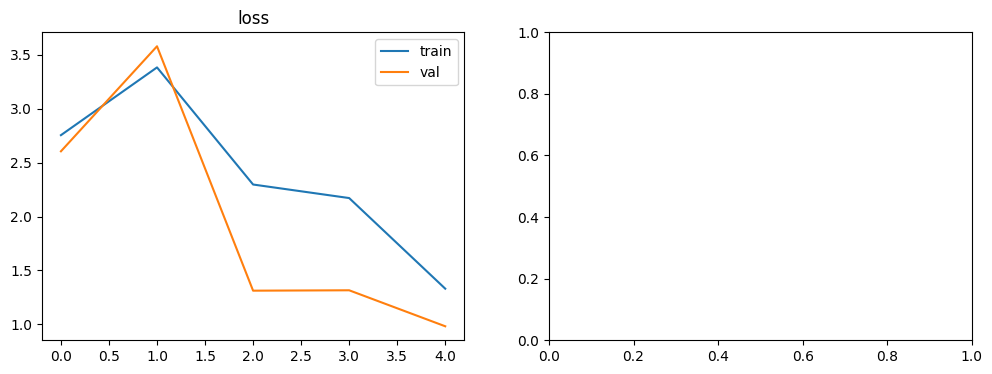

In [195]:
plot_history(history)